In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
from sklearn.datasets import load_iris
iris = load_iris()

![Sample Image](iris_flower.jpg)

In [29]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [30]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
df1 = df[df.target==0]
df2 = df[df.target==1]
df3 = df[df.target==2]

### *Sepal length vs Sepal Width (Setosa vs Versicolor vs Viginica)*

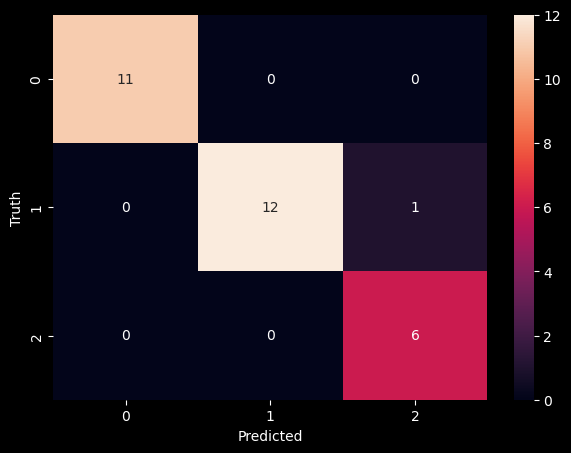

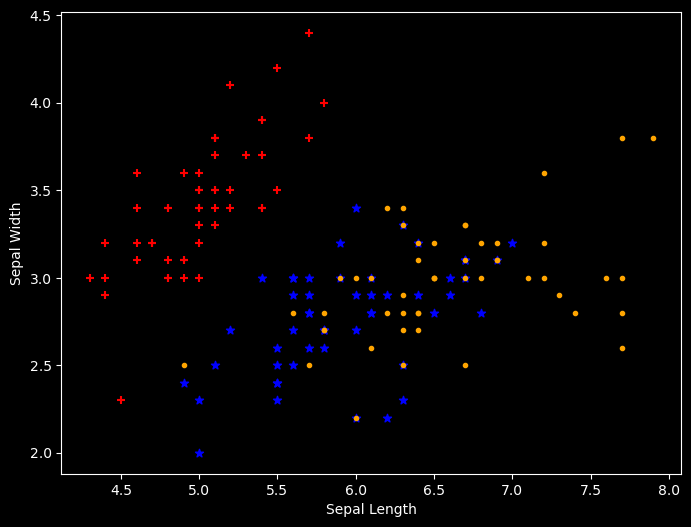

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue',marker='*')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='orange',marker='.')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.style.use('dark_background')
plt.show()

### *Petal length vs Petal Width (Setosa vs Versicolor vs Virginica)*

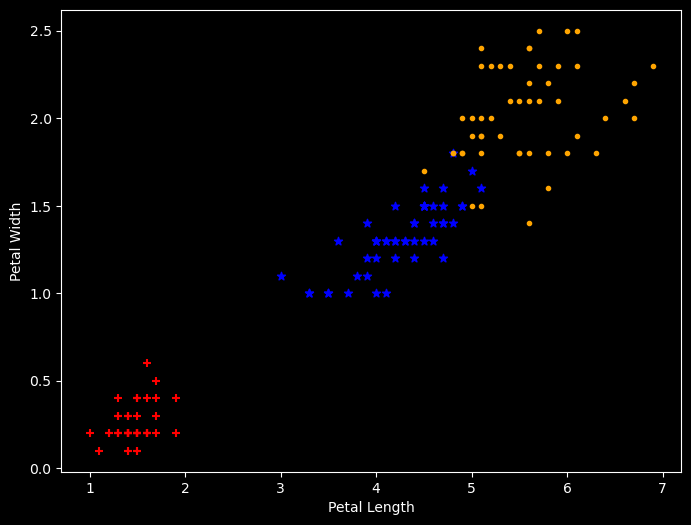

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker='+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue',marker='*')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='orange',marker='.')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.style.use('dark_background')
plt.show()

### *Train Test Split*

In [37]:
inputs = df.drop(['target'],axis=1)
inputs.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
outputs = df['target']
outputs.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,outputs,test_size=0.2,random_state=1)

In [40]:
len(X_train)

120

In [41]:
len(X_test)

30

### *Create KNN (K Nearest Neighbour classifier)*

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [43]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [44]:
knn.score(X_test, y_test)

0.9666666666666667

### *Confusion Matrix*

In [45]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(58.222222222222214, 0.5, 'Truth')

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

